# New Zealand Time-series Forecasting Model

# Pre-processing and Modeling 

In this notebook we are going to do pre-processing and modeling on our time-series data. We are going to decide what we want to focus on with this modeling. 

We'll start with the tourism arrivals data and then look at the accomodation data. 

We will beging by importing the necessary packages for looking at the data and creating our models.

<font size = "4">**[1.0 Modeling Tourism Data](#1.0-Modeling-Tourism-Data)**</font>
- **[1.1 Modeling Business Time Series](#1.1-Modeling-Business-Time-Series)**
    - [1.1.1 Modeling Business Visits to Auckland (Exp. Smoothing)](#1.1.1-Modeling-Business-Visits-to-Auckland-(Exp.-Smoothing))
    - [1.1.2 Modeling Business Visits to Christchurch (SARIMAX)](#1.1.2-Modeling-Business-Visits-to-Christchurch-(SARIMAX))
    - [1.1.3 Modeling Business Visits to Wellington (Exp. Smoothing)](#1.1.3-Modeling-Business-Visits-to-Wellington-(Exp.-Smoothing))
    - [1.1.4 Modeling Business Visits to Queenstown (ETS)](#1.1.4-Modeling-Business-Visits-to-Queenstown-(ETS))
    - [1.1.5 Modeling Business Visits to New Zealand (Exp. Smoothing)](#1.1.5-Modeling-Business-Visits-to-New-Zealand-(Exp.-Smoothing))
- **[1.2 Modeling Holiday and Vacation Visits Time Series](#1.2-Modeling-Holiday-and-Vacation-Visits)**
    - [1.2.1 Modeling Holiday and Vacation Visits to Auckland (Exp. Smoothing)](#1.2.1-Modeling-Holiday-and-Vacation-Visits-to-Auckland-(Exp.-Smoothing))
    - [1.2.2 Modeling Holiday and Vacation Visits to Christchurch (ARIMA)](#1.2.2-Modeling-Holiday-and-Vacation-Visits-to-Christchurch-(ARIMA))
    - [1.2.3 Modeling Holiday and Vacation Visits to Wellington (ETS)](#1.2.3-Modeling-Holiday-and-Vacation-Visits-to-Wellington-(ETS))
    - [1.2.4 Modeling Holiday and Vacation Visits to Queenstown (ETS)](#1.2.4-Modeling-Holiday-and-Vacation-Visits-to-Queenstown-(ETS))
    - [1.2.5 Modeling Holiday and Vacation Visits to New Zealand (BATS)](#1.2.5-Modeling-Holiday-and-Vacation-Visits-to-New-Zealand-(BATS))
- **[1.3 Modeling All Travel to Ports](#1.3-Modeling-All-Travel-to-Ports)**
  - [1.3.1 Modeling All Travel to Auckland (ETS)](#1.3.1-Modeling-All-Travel-to-Auckland-(ETS))
  - [1.3.2 Modeling All Travel to Christchurch (ARIMA)](#1.3.2-Modeling-All-Travel-to-Christchurch-(ARIMA))
  - [1.3.3 Modeling All Travel to Wellington (ETS)](#1.3.3-Modeling-All-Travel-to-Wellington-(ETS))
  
  - [1.3.4 Modeling All Travel to Queenstown (Auto_ARIMA)](#1.3.4-Modeling-All-Travel-to-Queenstown-(Auto_ARIMA))
  - [1.3.5 Modeling All Travel to New Zealand (Exp. Smoothing)](#1.3.5-Modeling-All-Travel-to-New-Zealand-(Exp.-Smoothing))

<font size = "4">**[2.0 Modeling Accomodation Data](#2.0-Modeling-Accomodation-Data)**</font>


  - **[2.1 All Accomodation Occupancy Models](#2.1-All-Accomodation-Occupancy-Models)**
    - [2.1.1 Modeling Total Occupancy in Auckland (Random Forest)](#2.1.1-Modeling-Total-Occupancy-in-Auckland-(Random-Forest))
    - [2.1.2 Modeling Total Occupancy in Canterbury (ETS)](#2.1.2-Modeling-Total-Occupancy-in-Canterbury-(ETS))
    - [2.1.3 Modeling Total Occupancy in Wellington (FB Prophet)](#2.1.3-Modeling-Total-Occupancy-in-Wellington-(FB-Prophet))
    - [2.1.4 Modeling Total Occupancy in Queenstown (AdaBoost)](#2.1.4-Modeling-Total-Occupancy-in-Queenstown-(AdaBoost))
    - [2.1.5 Modeling Total Occupancy in New Zealand (K-Nearest Neighbors)](#2.1.5-Modeling-Total-Occupancy-in-New-Zealand-(K-Nearest-Neighbors))
  - **[2.2 Modeling Motel Occupancy](#2.2-Modeling-Motel-Occupancy)**
    - [2.2.1 Modeling Motel Occupancy in Auckland (ETS)](#2.2.1-Modeling-Motel-Occupancy-in-Auckland-(ETS))
    - [2.2.2 Modeling Motel Occupancy in Canterbury (AdaBoost)](#2.2.2-Modeling-Motel-Occupancy-in-Canterbury-(AdaBoost))
    - [2.2.3 Modeling Motel Occupancy in Wellington (Random Forest)](#2.2.3-Modeling-Motel-Occupancy-in-Wellington-(Random-Forest))
    - [2.2.4 Modeling Motel Occupancy in Queenstown (BATS)](#2.2.4-Modeling-Motel-Occupancy-in-Queenstown-(BATS))
    - [2.2.5 Modeling Motel Occupancy in New Zealand (LightGBM)](#2.2.5-Modeling-Motel-Occupancy-in-New-Zealand-(LightGBM))
  - **[2.3 Modeling Hotel Occupancy](#2.3-Modeling-Hotel-Occupancy)**
    - [2.3.1 Modeling Hotel Occupancy in Auckland (Random Forest)](#2.3.1-Modeling-Hotel-Occupancy-in-Auckland-(Random-Forest))
    - [2.3.2 Modeling Hotel Occupancy in Canterbury (Exp. Smoothing)](#2.3.2-Modeling-Hotel-Occupancy-in-Canterbury-(Exp.-Smoothing))
    - [2.3.3 Modeling Hotel Occupancy in Wellington (Random Forest)](#2.3.3-Modeling-Hotel-Occupancy-in-Wellington-(Random-Forest))
    - [2.3.4 Modeling Hotel Occupancy in Queenstown (FB Prophet)](#2.3.4-Modeling-Hotel-Occupancy-in-Queenstown-(FB-Prophet))
    - [2.3.5 Modeling Hotel Occupancy in New Zealand (ETS)](#2.3.5-Modeling-Hotel-Occupancy-in-New-Zealand-(ETS))

In [1]:
# Import data processing packages
import pandas as pd
import numpy as np

#Time Series and Metrics Packages
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error
from prophet.diagnostics import performance_metrics, cross_validation

#Time Series Modeling Packages
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from statsmodels.tsa.statespace import sarimax 
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from darts.models.forecasting import tbats
from darts.models.forecasting.gradient_boosted_model import LightGBMModel
from darts.models.forecasting.random_forest import RandomForest
from darts import TimeSeries
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor
from prophet import Prophet
import lightgbm as lgb

#Visualization 
import matplotlib. pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", 'No frequency') 

# 1.0 Modeling Tourism Data
For our `arrivals` data we are going to look at the following regions as these have the most complete time-series data:
> - Auckland
> - Christchurch
> - Wellington
> - Queenstown
> - All New Zealand Ports
    
For each of these regions, we are going to look at the following reasons for travel:
> - Business
> - Holiday
> - Visiting Friends
> - Total Travel

We want to create the most complete picture that we can for our forecasting and making sure we work on creating as thorough of a forecasting as we can. 

In [ ]:
## Load our Tourism Data
# Remove extra white space at end of column

arrivals = pd.read_csv('../NZ Data/Arrivals Data Cleaned.csv', skipinitialspace = True, parse_dates = True, \
                       index_col = 0)
arrivals.columns = arrivals.columns.str.replace(r' $','', regex = True)
arrivals.columns

In [ ]:
# Check to make sure index is datetime
arrivals.index

In [ ]:
arrivals.head(3)

In [ ]:
# Load our model results from the pycaret notebook to look at which models might work best for us
potential_models = pd.read_csv('../NZ Data/arrivals_model_results.csv',index_col = 0)
potential_models.head()

We have here the list of all of our models that we tested using the pycaret model. As discussed in our previous notebook, we are not interested in actually modeling out all of these trends due to issues with the data or lack of historic data. We'll start with looking at our Arrivals dataset. Please refer to the pycaret notebook in the GitHub Repository for more information on what the final models that were generated by pycaret were.

We will be forecasting the following datasets from the Arrivals dataset:
- TOTAL ALL TRAVEL PURPOSESAuckland
- TOTAL ALL TRAVEL PURPOSESChristchurch
- TOTAL ALL TRAVEL PURPOSESWellington
- TOTAL ALL TRAVEL PURPOSESQueenstown
- TOTAL ALL TRAVEL PURPOSESTOTAL NEW ZEALAND PORTS
- BusinessAuckland
- BusinessChristchurch
- BusinessWellington
- BusinessQueenstown
- BusinessTOTAL NEW ZEALAND PORTS
- Holiday/VacationAuckland
- Holiday/VacationChristchurch
- Holiday/VacationWellington
- Holiday/VacationQueenstown
- Holiday/VacationTOTAL NEW ZEALAND PORTS

This is capture a wide breadth of models without overwhelming ourselves. Thus to make our above model results table more readable, we will subset and look at only the subset we are interested in.

In [ ]:
# Creating list of subset

arrivals_model_list = ['TOTAL ALL TRAVEL PURPOSESAuckland', 'TOTAL ALL TRAVEL PURPOSESChristchurch', \
                       'TOTAL ALL TRAVEL PURPOSESWellington', 'TOTAL ALL TRAVEL PURPOSESQueenstown',\
                      'TOTAL ALL TRAVEL PURPOSESTOTAL NEW ZEALAND PORTS',\
                      'BusinessAuckland','BusinessChristchurch','BusinessWellington', 'BusinessQueenstown',\
                      'BusinessTOTAL NEW ZEALAND PORTS',\
                      'Holiday/VacationAuckland','Holiday/VacationChristchurch', 'Holiday/VacationWellington',\
                      'Holiday/VacationQueenstown','Holiday/VacationTOTAL NEW ZEALAND PORTS']

In [ ]:
arrivals_model_sub = potential_models[potential_models['time_series'].isin(arrivals_model_list)]
arrivals_model_sub

## 1.1 Modeling Business Time Series

In this section we will model out our business model time series and analyze those results

### 1.1.1 Modeling Business Visits to Auckland (Exp. Smoothing)

In [ ]:
# Start with BusinessAuckland, we will use ExponentialSmoothing to model 
# First lets look at the data and understand its seasonality and ACF/PACF

y = arrivals['BusinessAuckland']

res = seasonal_decompose(y, model='mult')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

<br>
Since we have opted to use exponential smoothing, we are not required to take the first difference <br>
Exponential smoothing can handle trend data <br>
The statsmodel implementation of Exponentail Smoothing also optimizes its hyperparameters 
<br>

In [ ]:
exp = ExponentialSmoothing(y, trend = 'mul', seasonal = 'mul', seasonal_periods = 12, damped_trend = True)

In [ ]:
exp_fit = exp.fit(method = 'bh')
exp_fit.summary()

In [ ]:
plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()
plt.show()

In [ ]:
y_fore = exp_fit.forecast(36)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 1.1.2 Modeling Business Visits to Christchurch (SARIMAX)

In [ ]:
# BUSINESS CHRISTCHURCH
# Pycaret helped us decide that a linear model with deseasonilization and detrending would be the best model to utilize
# Due to the linearity of this data, we shall use SARIMAX as it is the combination of Linear Regression and SARIMA 

y = arrivals['BusinessChristchurch']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
dftest = adfuller(y, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

In [ ]:
# Lets first look at the ACF and PACF 

fig, ax = plt.subplots(2, figsize=(8,12))

# plot the ACF
plot_acf(y, ax=ax[0], vlines_kwargs={'ls':'--', 'linewidth': 0.7}, lags=26)

# place marker lines on lags 12 and 24 to highlight the seasonality
ax[0].axvline(12, color='red', ls='--', alpha=0.8, lw=0.7, label='lag = 12')
ax[0].axvline(24, color='orange', ls='--', alpha=1, lw=0.8, label='lag = 24')
ax[0].legend()

# plot the PACF
plot_pacf(y, ax=ax[1], vlines_kwargs={'ls':'--', 'linewidth': 0.7}, lags=26)

plt.show()

In [ ]:
#I will use auto_arima in order to determine ARIMA orders
auto_arima(y, m=12).summary()

In [ ]:
model = sarimax.SARIMAX(y, order=(0,1,1), seasonal_order=(1,0,1,12))
model_fit = model.fit()

forecast = model_fit.forecast(24)
pred = model_fit.predict()[12:]

model_fit.summary()

In [ ]:
# Looking at how our predicted models did
plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(pred, alpha=0.7, label='Predicted')
plt.plot(forecast, label='Forecasted Data', alpha=0.5, ls='--')

plt.legend()
plt.show()

### 1.1.3 Modeling Business Visits to Wellington (Exp. Smoothing)

In [ ]:
# business wellington
y = arrivals['BusinessWellington']

res = seasonal_decompose(y, model='add')

#'Plot the original data, the trend, the seasonality, and the residuals'
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
exp = ExponentialSmoothing(y, trend = 'add', seasonal = 'add', seasonal_periods = 12, damped_trend = True)
exp_fit = exp.fit(method = 'bh')

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()
plt.show();

In [ ]:
exp_fit.summary()

In [ ]:
y_fore = exp_fit.forecast(36)
plt.figure(figsize=(12,8))

plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 1.1.4 Modeling Business Visits to Queenstown (ETS)

In [ ]:
# Business Queenstown using ETS
y = arrivals['BusinessQueenstown']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
ETS = ETSModel(y, error = 'add', trend = 'add', seasonal = 'add', damped_trend = True, seasonal_periods = 12)
ETS_fit = ETS.fit()

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()
plt.show()

In [ ]:
ETS_fit.summary()

In [ ]:
y_fore = ETS_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 1.1.5 Modeling Business Visits to New Zealand (Exp. Smoothing)

In [ ]:
#All BUsiness NZ
y = arrivals['BusinessTOTAL NEW ZEALAND PORTS']

res = seasonal_decompose(y, model='mul')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
exp = ExponentialSmoothing(y, trend = 'mul', seasonal = 'mul', seasonal_periods = 12, damped_trend = True)
exp_fit = exp.fit(method = 'ls')

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()
plt.show()

In [ ]:
exp_fit.summary()

In [ ]:
y_fore = exp_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

## 1.2 Modeling Holiday and Vacation Visits

### 1.2.1 Modeling Holiday and Vacation Visits to Auckland (Exp. Smoothing)

In [ ]:
#Holiday/VacationAuckland Exp Smoothing
y = arrivals['Holiday/VacationAuckland']

res = seasonal_decompose(y, model='mul')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
exp = ExponentialSmoothing(y, trend = 'mul', seasonal = 'mul', damped_trend = True)
exp_fit = exp.fit(method = 'ls')

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()
plt.show()

In [ ]:
exp_fit.summary()

In [ ]:
y_fore = exp_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 1.2.2 Modeling Holiday and Vacation Visits to Christchurch (ARIMA)

In [ ]:
#Holiday/VacationChristchurch ARIMA
y = arrivals['Holiday/VacationChristchurch']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
fig, ax = plt.subplots(2, figsize=(8,12))

# plot the ACF
plot_acf(y, ax=ax[0], vlines_kwargs={'ls':'--', 'linewidth': 0.7}, lags=26)

# place marker lines on lags 12 and 24 to highlight the seasonality
ax[0].axvline(12, color='red', ls='--', alpha=0.8, lw=0.7, label='lag = 12')
ax[0].axvline(24, color='orange', ls='--', alpha=1, lw=0.8, label='lag = 24')
ax[0].legend()

# plot the PACF
plot_pacf(y, ax=ax[1], vlines_kwargs={'ls':'--', 'linewidth': 0.7}, lags=26)

plt.show()

In [ ]:
dftest = adfuller(y, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

In [ ]:
#I will use auto_arima in order to determine ARIMA orders
auto_arima(y, m=12).summary()

In [ ]:
model = sarimax.SARIMAX(y, order=(0,1,0), seasonal_order=(2,0,1,12))
model_fit = model.fit()

forecast = model_fit.forecast(24)
pred = model_fit.predict()[12:]

model_fit.summary()

In [ ]:
plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(pred, alpha=0.7, label='Predicted')
plt.plot(forecast, label='Forecasted Data', alpha=0.5, ls='--')

plt.legend()
plt.show()
# plt.plot(forecast)

### 1.2.3 Modeling Holiday and Vacation Visits to Wellington (ETS)

In [ ]:
#Holiday/VacationWellington ETS
y = arrivals['Holiday/VacationWellington']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
ETS = ETSModel(y, error = 'add', trend = 'add', seasonal = 'add', damped_trend = True, seasonal_periods = 12)
ETS_fit = ETS.fit()

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()
plt.show()

In [ ]:
ETS_fit.summary()

In [ ]:
y_fore = ETS_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 1.2.4 Modeling Holiday and Vacation Visits to Queenstown (ETS)

In [ ]:
#Holiday/VacationQueenstown ETS
y = arrivals['Holiday/VacationQueenstown']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
ETS = ETSModel(y, error = 'add', trend = 'add', seasonal = 'add', damped_trend = True, seasonal_periods = 12)
ETS_fit = ETS.fit()

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()
plt.show()

In [ ]:
ETS_fit.summary()

In [ ]:
y_fore = ETS_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 1.2.5 Modeling Holiday and Vacation Visits to New Zealand (BATS)

In [ ]:

#Holiday/VacationTOTAL NEW ZEALAND PORT
y = arrivals[['Holiday/VacationTOTAL NEW ZEALAND PORTS']]

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
#Create TimeSeries datatype
ts = TimeSeries.from_series(y)

#Create the BATS model and fit
model = tbats.BATS()
model_fit = model.fit(ts)

#Predict with the model
y_pred = model_fit.predict(36)

#Convert back to dataframe so we can use it
y_pred_df = y_pred.pd_dataframe()
y_pred_df.head()

In [ ]:
#Plot onto the time series
plt.figure(figsize=(15,8))

plt.plot(y, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_pred_df)

## 1.3 Modeling All Travel to Ports

### 1.3.1 Modeling All Travel to Auckland (ETS)

In [ ]:
#TOTAL ALL TRAVEL PURPOSESAuckland ETS
y = arrivals['Holiday/VacationQueenstown']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
ETS = ETSModel(y, error = 'add', trend = 'add', seasonal = 'add', damped_trend = True, seasonal_periods = 12)
ETS_fit = ETS.fit()

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()
plt.show()

In [ ]:
ETS_fit.summary()

In [ ]:
y_fore = ETS_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 1.3.2 Modeling All Travel to Christchurch (ARIMA)

In [ ]:
#TOTAL ALL TRAVEL PURPOSESChristchurch arima
y = arrivals['TOTAL ALL TRAVEL PURPOSESChristchurch']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
fig, ax = plt.subplots(2, figsize=(8,12))

# plot the ACF
plot_acf(y, ax=ax[0], vlines_kwargs={'ls':'--', 'linewidth': 0.7}, lags=26)

# place marker lines on lags 12 and 24 to highlight the seasonality
ax[0].axvline(12, color='red', ls='--', alpha=0.8, lw=0.7, label='lag = 12')
ax[0].axvline(24, color='orange', ls='--', alpha=1, lw=0.8, label='lag = 24')
ax[0].legend()

# plot the PACF
plot_pacf(y, ax=ax[1], vlines_kwargs={'ls':'--', 'linewidth': 0.7}, lags=26)

plt.show()

In [ ]:
#I will use auto_arima in order to determine ARIMA orders
auto_arima(y, m=12).summary()

In [ ]:
model = sarimax.SARIMAX(y, order=(0,1,2), seasonal_order=(2,0,1,12))
model_fit = model.fit()

forecast = model_fit.forecast(24)
pred = model_fit.predict()[12:]

model_fit.summary()

In [ ]:
plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(pred, alpha=0.7, label='Predicted')
plt.plot(forecast, label='Forecasted Data', alpha=0.5, ls='--')

plt.legend()
plt.show()
# plt.plot(forecast)

### 1.3.3 Modeling All Travel to Wellington (ETS)

In [ ]:
#TOTAL ALL TRAVEL PURPOSESWellington ETS
y = arrivals['TOTAL ALL TRAVEL PURPOSESWellington']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
ETS = ETSModel(y, error = 'add', trend = 'add', seasonal = 'add', damped_trend = True, seasonal_periods = 12)
ETS_fit = ETS.fit()

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()

plt.show()

In [ ]:
ETS_fit.summary()

In [ ]:
y_fore = ETS_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 1.3.4 Modeling All Travel to Queenstown (Auto_ARIMA)

In [ ]:
#TOTAL ALL TRAVEL PURPOSESQueenstown auto_arima
y = arrivals['TOTAL ALL TRAVEL PURPOSESQueenstown']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
fig, ax = plt.subplots(2, figsize=(8,12))

# plot the ACF
plot_acf(y, ax=ax[0], vlines_kwargs={'ls':'--', 'linewidth': 0.7}, lags=26)

# place marker lines on lags 12 and 24 to highlight the seasonality
ax[0].axvline(12, color='red', ls='--', alpha=0.8, lw=0.7, label='lag = 12')
ax[0].axvline(24, color='orange', ls='--', alpha=1, lw=0.8, label='lag = 24')
ax[0].legend()

# plot the PACF
plot_pacf(y, ax=ax[1], vlines_kwargs={'ls':'--', 'linewidth': 0.7}, lags=26)

plt.show()

In [ ]:
#I will use auto_arima in order to determine ARIMA orders
auto_arima(y, m=12, method = 'cg', information_criterion = 'bic', error_action = 'ignore').summary()

In [ ]:
model = sarimax.SARIMAX(y, order=(2,1,0), seasonal_order=(2,0,1,12))
model_fit = model.fit()

forecast = model_fit.forecast(24)
pred = model_fit.predict()[12:]

model_fit.summary()

In [ ]:
plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(pred, alpha=0.7, label='Predicted')
plt.plot(forecast, label='Forecasted Data', alpha=0.5, ls='--')

plt.legend()
plt.show()
# plt.plot(forecast)

### 1.3.5 Modeling All Travel to New Zealand (Exp. Smoothing)

In [ ]:
#TOTAL ALL TRAVEL PURPOSESTOTAL NEW ZEALAND PORTS
y = arrivals['TOTAL ALL TRAVEL PURPOSESTOTAL NEW ZEALAND PORTS']

res = seasonal_decompose(y, model='mul')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
exp = ExponentialSmoothing(y, trend = 'mul', seasonal = 'mul', damped_trend = True)
exp_fit = exp.fit(method = 'ls')

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()
plt.show()

In [ ]:
exp_fit.summary()

In [ ]:
y_fore = exp_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

# 2.0 Modeling Accomodation Data

In [3]:
accomodations = pd.read_csv('../NZ Data/Accomodation Data Cleaned.csv', parse_dates = True, \
                       index_col = 0)
accomodations.head()

,TotalNorthlandCapacity,TotalNorthlandOccupancy,TotalAucklandCapacity,TotalAucklandOccupancy,TotalCoromandelCapacity,TotalCoromandelOccupancy,TotalWaikatoCapacity,TotalWaikatoOccupancy,TotalBay of PlentyCapacity,TotalBay of PlentyOccupancy,...,Holiday parksDunedinCapacity,Holiday parksDunedinOccupancy,Holiday parksCluthaCapacity,Holiday parksCluthaOccupancy,Holiday parksFiordlandCapacity,Holiday parksFiordlandOccupancy,Holiday parksSouthlandCapacity,Holiday parksSouthlandOccupancy,Holiday parksTotal New ZealandCapacity,Holiday parksTotal New ZealandOccupancy
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,322710,120769,496093,280342,131316,66529,134261,45190,137082,65859,...,18321,6277,8804,2534,12059,..,29853,..,1713649,557313
2001-02-01,291508,84755,444388,267818,118944,33820,121772,40636,122780,38075,...,16548,4722,7952,1748,10892,..,26964,..,1541876,276204
2001-03-01,323392,79564,495163,282679,129580,29965,134509,49575,136059,36555,...,18321,4758,8804,1399,12059,..,29853,..,1698583,239677
2001-04-01,312960,64383,480120,226099,125820,22430,130380,39024,131670,31781,...,17730,3578,8520,1138,11670,..,28890,3825,1621260,199816
2001-05-01,313720,42146,501115,219150,128929,11329,130820,35345,136059,24574,...,18321,2194,7223,698,12059,..,25947,..,1537042,97871


In [ ]:
accomodations_model_list = pd.read_csv('../NZ Data/accomodations_model_results.csv')
accomodations_model_list

## 2.1 All Accomodation Occupancy Models

### 2.1.1 Modeling Total Occupancy in Auckland (Random Forest)

In [ ]:
#TotalAucklandOccupancy random forest w/ cond deseasonalize and detrend
y = accomodations[['TotalAucklandOccupancy']]

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
#Code from machinelearningmastery, Jason Brownlee
# transform a time series dataset into a supervised learning dataset

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions


#Our function for multistep forecast
def multistep_forecast(steps, y_list):
    y_pred = y_list.copy()
    
    for s in range(steps):
        train = series_to_supervised(y_pred, n_in=steps)
            # split into input and output columns
        trainX, trainy = train[:, :-1], train[:, -1]
            # fit model
        model = RandomForestRegressor(n_estimators=1000)
        model.fit(trainX, trainy)
        row = y_pred[-steps:]
        yhat = model.predict(np.asarray([row]))
        y_pred.append(yhat[0])
    return y_pred

In [ ]:
# Convert data to a list
y_list = list(y['TotalAucklandOccupancy'])
len(y_list)

In [ ]:
# transform the time series data into supervised learning
data = series_to_supervised(y_list, n_in=50)
# evaluate
mae, y, yhat = walk_forward_validation(data, n_test=50)
#print('MAE: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# transform the time series data into supervised learning
n = 50
y_pred = multistep_forecast(n, y_list)

In [ ]:
len(y_pred)

In [ ]:
pred_index = range(len(y_pred) - n, len(y_pred))

In [ ]:
plt.figure(figsize = (12,10))
plt.plot(y_list, label='Expected')
(line1,) = plt.plot(pred_index, y_pred[-n:], label='Predicted')
plt.legend()
plt.show()

In [ ]:
#Use DARTS as our comparison

from darts.models.forecasting.random_forest import RandomForest

In [ ]:
y = accomodations[['TotalAucklandOccupancy']]
rf = RandomForest(lags = 24)
#Convert to timeseries
y_ts = TimeSeries.from_dataframe(y)
rf.fit(y_ts)

y_pred = rf.predict(24)
y_pred_df = TimeSeries.pd_dataframe(y_pred)

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(y, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_pred_df)

In [ ]:
y = accomodations['TotalAucklandOccupancy']
fig, ax = plt.subplots(2, figsize=(8,12))

# plot the ACF
plot_acf(y, ax=ax[0], vlines_kwargs={'ls':'--', 'linewidth': 0.7}, lags=26)

# place marker lines on lags 12 and 24 to highlight the seasonality
ax[0].axvline(12, color='red', ls='--', alpha=0.8, lw=0.7, label='lag = 12')
ax[0].axvline(24, color='orange', ls='--', alpha=1, lw=0.8, label='lag = 24')
ax[0].legend()

# plot the PACF
plot_pacf(y, ax=ax[1], vlines_kwargs={'ls':'--', 'linewidth': 0.7}, lags=26)

plt.show()

In [ ]:
auto_arima(y, m=12, method = 'cg', information_criterion = 'bic', error_action = 'ignore').summary()

In [ ]:
model = sarimax.SARIMAX(y, order=(1,1,2), seasonal_order=(1,0,0,12))
model_fit = model.fit()

forecast = model_fit.forecast(24)
pred = model_fit.predict()[12:]

In [ ]:
plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(pred, alpha=0.7, label='Predicted')
plt.plot(forecast, label='Forecasted Data', alpha=0.5, ls='--')

plt.legend()
plt.show()
# plt.plot(forecast)

In [ ]:
y = accomodations['TotalAucklandOccupancy']
y = y.astype('float64')

ETS = ETSModel(y, error = 'add', trend = 'add', seasonal = 'add', seasonal_periods = 12)
ETS_fit = ETS.fit()

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()

plt.show()

In [ ]:
ETS_fit.summary()

In [ ]:
y_fore = ETS_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 2.1.2 Modeling Total Occupancy in Canterbury (ETS)

In [ ]:
#TotalCanterbury ETS
y = accomodations['TotalCanterburyOccupancy']
y = y.astype('float64')


res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
ETS = ETSModel(y, error = 'add', trend = 'add', seasonal = 'add', seasonal_periods = 12)
ETS_fit = ETS.fit()

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')
y = y.astype('float64')

plt.legend()

plt.show()

In [ ]:
ETS_fit.summary()

In [ ]:
y_fore = ETS_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 2.1.3 Modeling Total Occupancy in Wellington (FB Prophet)

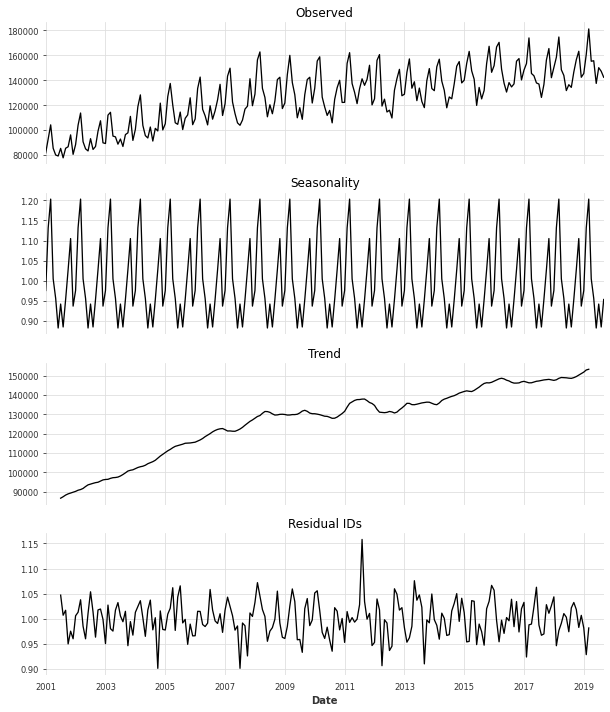

In [4]:
#TotalWellington Prophet
y = accomodations['TotalWellingtonOccupancy']

res = seasonal_decompose(y, model='mul')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed');
res.seasonal.plot(ax=ax2, title='Seasonality');
res.trend.plot(ax=ax3, title='Trend');
res.resid.plot(ax=ax4, title='Residual IDs');

In [5]:
# Preparing our data for prophet
y_prophet = accomodations[['TotalWellingtonOccupancy']]
y_prophet = y_prophet.reset_index()
y_prophet.rename(columns = {'Date':'ds', 'TotalWellingtonOccupancy':'y'}, inplace = True)
y_prophet.head()

,ds,y
0,2001-01-01,81801
1,2001-02-01,92859
2,2001-03-01,104336
3,2001-04-01,85569
4,2001-05-01,80190


In [6]:
%%capture
#Initial model we will tweak this model a bit
#to stop error messages, mostly unnecessary INFO
%logstop[]
m = Prophet()
m.fit(y_prophet)
y_pred = m.make_future_dataframe(periods = 24, freq = 'MS')

In [7]:
y_pred.tail()

NameError: name 'y_pred' is not defined

In [ ]:
#Have to place this here to avoid further extraneous messages from prophet
#Get very long during certain processes
#Cannot avoid the first one (due to cmdstanpy)

import logging
logger = logging.getLogger('cmdstanpy')
logger.setLevel(logging.ERROR)
logger2 = logging.getLogger('prophet')
logger2.setLevel(logging.ERROR)

In [ ]:
y_fore = m.predict(y_pred)
y_fore.tail()

In [ ]:
#looks okay
fig1 = m.plot(y_fore)

In [ ]:
#First model plot, maybe we can improve on this
plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(y_fore['ds'], y_fore['yhat'], alpha=0.7, label='Predicted')

plt.legend()

plt.show()

In [ ]:
#Some cross validation to check our metrics
#Manually create cutoffs as cross_validation does not do monthly
cutoffs = pd.date_range(start='2014-01-01', end = '2017-09-01', freq='2MS')
y_cv = cross_validation(m, horizon = '730 days', cutoffs = cutoffs)
y_metrics = performance_metrics(y_cv)
y_metrics

In [ ]:
#Lets tune a little
m = Prophet(daily_seasonality = False, seasonality_mode = 'multiplicative')
m.add_country_holidays(country_name = 'US')
m.fit(y_prophet)
y_pred = m.make_future_dataframe(periods = 24, freq = 'MS')
y_pred.tail()

In [ ]:
y_fore = m.predict(y_pred)
y_fore.tail()

In [ ]:
#First model plot, maybe we can improve on this
plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(y_fore['ds'], y_fore['yhat'], alpha=0.7, label='Predicted')

plt.legend()

plt.show()

In [ ]:
cutoffs = pd.date_range(start='2014-01-01', end = '2017-09-01', freq='2MS')
y_cv = cross_validation(m, horizon = '730 days', cutoffs = cutoffs)
y_metrics = performance_metrics(y_cv)
y_metrics.head()

Seems like model got worse, we'll stick to the defaults for forecasting for now!

### 2.1.4 Modeling Total Occupancy in Queenstown (AdaBoost)

In [ ]:
#TotalQueenstown AdaBoost

y = accomodations['TotalQueenstownOccupancy']

res = seasonal_decompose(y, model='mul')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
# fit AdaBoost model and make a one step prediction
def random_ada_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = AdaBoostClassifier(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_ada(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_ada_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

def multistep_ada(steps, y_list):
    y_pred = y_list.copy()
    
    for s in range(steps):
        train = series_to_supervised(y_pred, n_in=steps)
            # split into input and output columns
        trainX, trainy = train[:, :-1], train[:, -1]
            # fit model
        model = AdaBoostClassifier(n_estimators=1000)
        model.fit(trainX, trainy)
        row = y_pred[-steps:]
        yhat = model.predict(np.asarray([row]))
        y_pred.append(yhat[0])
    return y_pred

In [ ]:
# Convert data to a list
y_list = list(y)
# transform the time series data into supervised learning
data = series_to_supervised(y_list, n_in=100)
# evaluate
mae, y, yhat = walk_forward_ada(data, n_test=100)
#print('MAE: %.3f' % mae)
# plot expected vs predicted
fig = plt.figure(figsize = (12,10))
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# set amount to forecast
n = 50
#Forecast forward
y_pred = multistep_ada(n, y_list)
pred_index = range(len(y_pred) - n, len(y_pred))

#plot our forecasting
plt.figure(figsize = (12,10))
plt.plot(y_list, label='Expected')
(line1,) = plt.plot(pred_index, y_pred[-n:], label='Predicted')
plt.legend()
plt.show()

### 2.1.5 Modeling Total Occupancy in New Zealand (K-Nearest Neighbors)

In [ ]:
#TotalTotalnew Zealand KNN 
y = accomodations[['TotalTotal New ZealandOccupancy']]

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
def random_knn_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = KNeighborsRegressor(n_neighbors = 10)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_knn(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_knn_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

def multistep_knn(steps, y_list):
    y_pred = y_list.copy()
    
    for s in range(steps):
        train = series_to_supervised(y_pred, n_in=steps)
            # split into input and output columns
        trainX, trainy = train[:, :-1], train[:, -1]
            # fit model
        model = KNeighborsRegressor(n_neighbors = 10)
        model.fit(trainX, trainy)
        row = y_pred[-steps:]
        yhat = model.predict(np.asarray([row]))
        y_pred.append(yhat[0])
    return y_pred

In [ ]:
# Convert data to a list
y_list = list(y['TotalTotal New ZealandOccupancy'])
# transform the time series data into supervised learning
data = series_to_supervised(y_list, n_in=100)
# evaluate
mae, y, yhat = walk_forward_knn(data, n_test=100)
#print('MAE: %.3f' % mae)
# plot expected vs predicted
fig = plt.figure(figsize = (12,10))
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# set amount to forecast
n = 50
#Forecast forward
y_pred = multistep_knn(n, y_list)
pred_index = range(len(y_pred) - n, len(y_pred))

#plot our forecasting
plt.figure(figsize = (12,10))
plt.plot(y_list, label='Expected')
(line1,) = plt.plot(pred_index, y_pred[-n:], label='Predicted')
plt.legend()
plt.show()

## 2.2 Modeling Motel Occupancy

### 2.2.1 Modeling Motel Occupancy in Auckland (ETS)

In [ ]:
#Motels Auckland ETS
y = accomodations['MotelsAucklandOccupancy']
y = y.astype('float64')

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
ETS = ETSModel(y, error = 'add', trend = 'add', seasonal = 'add', seasonal_periods = 12)
ETS_fit = ETS.fit()

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()

plt.show()

In [ ]:
ETS_fit.summary()

In [ ]:
y_fore = ETS_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 2.2.2 Modeling Motel Occupancy in Canterbury (AdaBoost)

In [ ]:
#Motels Canterbury Adaboost
y = accomodations['MotelsCanterburyOccupancy']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
# Convert data to a list
y_list = list(y)
# transform the time series data into supervised learning
data = series_to_supervised(y_list, n_in=100)
# evaluate
mae, y, yhat = walk_forward_ada(data, n_test=100)
#print('MAE: %.3f' % mae)
# plot expected vs predicted
plt.figure(figsize = (12,10))
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# set amount to forecast
n = 50
#Forecast forward
y_pred = multistep_ada(n, y_list)
pred_index = range(len(y_pred) - n, len(y_pred))

#plot our forecasting
plt.figure(figsize = (12,10))
plt.plot(y_list, label='Expected')
(line1,) = plt.plot(pred_index, y_pred[-n:], label='Predicted')
plt.legend()
plt.show()

### 2.2.3 Modeling Motel Occupancy in Wellington (Random Forest)

In [ ]:
#Motels Wellington Decision Tree
y = accomodations['MotelsWellingtonOccupancy']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
# Convert data to a list
y_list = list(y)
# transform the time series data into supervised learning
data = series_to_supervised(y_list, n_in=100)
# evaluate
mae, y, yhat = walk_forward_validation(data, n_test=100)
#print('MAE: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# choose how many steps forward
n = 50
#run func
y_pred = multistep_forecast(n, y_list)
#find length 
pred_index = range(len(y_pred) - n, len(y_pred))
#plot
plt.figure(figsize = (12,10))
plt.plot(y_list, label='Expected')
(line1,) = plt.plot(pred_index, y_pred[-n:], label='Predicted')
plt.legend()
plt.show()

### 2.2.4 Modeling Motel Occupancy in Queenstown (BATS)

In [ ]:
#Motels Queenstown BATS
y = accomodations[['MotelsQueenstownOccupancy']]

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
#Create TimeSeries datatype
ts = TimeSeries.from_series(y)

#Create the BATS model and fit
model = tbats.BATS()
model_fit = model.fit(ts)

#Predict with the model
y_pred = model_fit.predict(36)

#Convert back to dataframe so we can use it
y_pred_df = y_pred.pd_dataframe()
y_pred_df.head()

In [ ]:
#Plot onto the time series
plt.figure(figsize=(15,8))

plt.plot(y, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_pred_df)

### 2.2.5 Modeling Motel Occupancy in New Zealand (LightGBM)

In [ ]:
#Motels Total New Zealand
#lightGBM using DARTS
y = accomodations[['MotelsTotal New ZealandOccupancy']]

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
from darts.models.forecasting.gradient_boosted_model import LightGBMModel

In [ ]:
lgbm = LightGBMModel(lags = 24)

In [ ]:
#Convert to timeseries
y_ts = TimeSeries.from_dataframe(y)

lgbm.fit(y_ts)

In [ ]:
y_pred = lgbm.predict(24)

In [ ]:
y_pred_df = TimeSeries.pd_dataframe(y_pred)

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(y, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_pred_df)

## 2.3 Modeling Hotel Occupancy

### 2.3.1 Modeling Hotel Occupancy in Auckland (Random Forest)

In [ ]:
#Hotels Auckland Random Forest
y = accomodations['HotelsAucklandOccupancy']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
# Convert data to a list
y_list = list(y)
# transform the time series data into supervised learning
data = series_to_supervised(y_list, n_in=100)
# evaluate
mae, y, yhat = walk_forward_validation(data, n_test=100)
#print('MAE: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# transform the time series data into supervised learning
n = 50
y_pred = multistep_forecast(n, y_list)
pred_index = range(len(y_pred) - n, len(y_pred))
plt.figure(figsize = (12,10))
plt.plot(y_list, label='Expected')
(line1,) = plt.plot(pred_index, y_pred[-n:], label='Predicted')
plt.legend()
plt.show()

### 2.3.2 Modeling Hotel Occupancy in Canterbury (Exp. Smoothing)

In [ ]:
#Hotels Canterbury Exp Smooth
y = accomodations['HotelsCanterburyOccupancy']

res = seasonal_decompose(y, model='mult')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
exp = ExponentialSmoothing(y, trend = 'mul', seasonal = 'mul', damped_trend = True)
exp_fit = exp.fit(method = 'ls')

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()
plt.show()

In [ ]:
exp_fit.summary()

In [ ]:
y_fore = exp_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(exp_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)

### 2.3.3 Modeling Hotel Occupancy in Wellington (Random Forest)

In [ ]:
#hotels Wellington Random Forest
y = accomodations['HotelsWellingtonOccupancy']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
# Convert data to a list
y_list = list(y)
# transform the time series data into supervised learning
data = series_to_supervised(y_list, n_in=100)
# evaluate
mae, y, yhat = walk_forward_validation(data, n_test=100)
#print('MAE: %.3f' % mae)
# plot expected vs predicted
plt.figure(figsize = (12,10))
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# transform the time series data into supervised learning
n = 50
y_pred = multistep_forecast(n, y_list)
pred_index = range(len(y_pred) - n, len(y_pred))
plt.figure(figsize = (12,10))
plt.plot(y_list, label='Expected')
(line1,) = plt.plot(pred_index, y_pred[-n:], label='Predicted')
plt.legend()
plt.show()

### 2.3.4 Modeling Hotel Occupancy in Queenstown (FB Prophet)

In [ ]:
#Hotels Queenstown Prophet
y = accomodations['HotelsQueenstownOccupancy']

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
# Preparing our data for prophet
y_prophet = accomodations[['HotelsQueenstownOccupancy']]
y_prophet = y_prophet.reset_index()
y_prophet.rename(columns = {'Date':'ds', 'HotelsQueenstownOccupancy':'y'}, inplace = True)
y_prophet.head()

In [ ]:
#Sticking to default model
m = Prophet()
m.fit(y_prophet)
y_pred = m.make_future_dataframe(periods = 24, freq = 'MS')
y_pred.tail()

In [ ]:
y_fore = m.predict(y_pred)
y_fore.tail()

In [ ]:
#First model plot, maybe we can improve on this
plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(y_fore['ds'], y_fore['yhat'], alpha=0.7, label='Predicted')

plt.legend()

plt.show()

In [ ]:
cutoffs = pd.date_range(start='2014-01-01', end = '2017-09-01', freq='2MS')
y_cv = cross_validation(m, horizon = '730 days', cutoffs = cutoffs)
y_metrics = performance_metrics(y_cv)
y_metrics.head()

### 2.3.5 Modeling Hotel Occupancy in New Zealand (ETS)

In [ ]:
#Hotels TNZ ETS
y = accomodations['TotalCanterburyOccupancy']
y = y.astype('float')

res = seasonal_decompose(y, model='add')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [ ]:
ETS = ETSModel(y, error = 'add', trend = 'add', seasonal = 'mul', seasonal_periods = 12)
ETS_fit = ETS.fit()

plt.figure(figsize=(12,8))

plt.title('Original and Predicted')
plt.plot(y, label='Original')
plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')

plt.legend()

plt.show()

In [ ]:
ETS_fit.summary()

In [ ]:
y_fore = ETS_fit.forecast(36)
plt.figure(figsize=(15,8))

plt.plot(ETS_fit.fittedvalues, alpha=0.7, label='Predicted')
(line1,) = plt.plot(y_fore)